In [2]:
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.utils import *
from keras.models import Sequential
from keras.layers import Conv2D , Dropout , MaxPooling2D , Dense , Flatten


Using TensorFlow backend.


Labels : 3
(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))


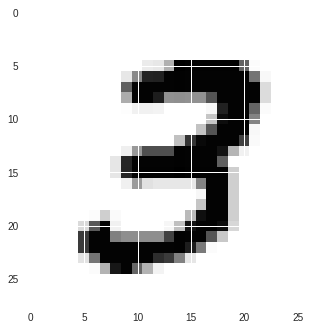

In [3]:
(x_train ,y_train),(x_test,y_test)= mnist.load_data()

import random
i = random.randint(1,10)
plt.imshow(x_train[i])
print("Labels : %s" %y_train[i])
print((x_train.shape ,y_train.shape),(x_test.shape,y_test.shape))


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255.0
x_test/=255.0


number_of_classes  = 10

y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

print(x_train.shape, y_train.shape)


((60000, 28, 28, 1), (60000, 10))


In [5]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size =  (3,3) , input_shape = (28,28,1) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64 ,kernel_size = (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes , activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               819712    
__________

In [6]:
model.fit(x_train, y_train , epochs = 10 , batch_size = 32)
scores = model.evaluate(x_test,y_test,verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
60000/60000 [==============================] - 28s 472us/step - loss: 0.1450 - acc: 0.9542
Epoch 2/10
37728/60000 [=================>............] - ETA: 9s - loss: 0.0586 - acc: 0.9819

60000/60000 [==============================] - 25s 410us/step - loss: 0.0554 - acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 24s 407us/step - loss: 0.0431 - acc: 0.9866
Epoch 4/10
  544/60000 [..............................] - ETA: 24s - loss: 0.0380 - acc: 0.9835

60000/60000 [==============================] - 24s 408us/step - loss: 0.0362 - acc: 0.9888
Epoch 5/10
43648/60000 [====================>.........] - ETA: 6s - loss: 0.0284 - acc: 0.9907

60000/60000 [==============================] - 25s 408us/step - loss: 0.0305 - acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.0264 - acc: 0.9914
Epoch 7/10
 2016/60000 [>.............................] - ETA: 23s - loss: 0.0336 - acc: 0.9896

60000/60000 [==============================] - 24s 407us/step - loss: 0.0238 - acc: 0.9922
Epoch 8/10
44736/60000 [=====================>........] - ETA: 6s - loss: 0.0204 - acc: 0.9937

60000/60000 [==============================] - 24s 406us/step - loss: 0.0208 - acc: 0.9937
Epoch 9/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0193 - acc: 0.9939
Epoch 10/10
 1952/60000 [..............................] - ETA: 24s - loss: 0.0222 - acc: 0.9933

60000/60000 [==============================] - 24s 406us/step - loss: 0.0190 - acc: 0.9941
Accuracy: 99.36%


In [0]:
import pandas as pd
predictions = model.predict_classes(x_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)